## Project2 Model: Neural Network for Fraud Detection

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:

#oot_df= pd.read_csv('oot.csv')
#train_df= pd.read_csv('train.csv')
#test_df= pd.read_csv('test.csv')

data = pd.read_csv("vars_final_zscale.csv", index_col = 0)

In [7]:
# split data into out of date(after 11/1/10), train and test
oot_df = data.iloc[84300:,:]
trte_df = data.iloc[:84299,:]

In [8]:
X = trte_df.iloc[:, data.columns != 'Fraud']
y = trte_df.iloc[:, data.columns == 'Fraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [10]:
X.shape

(84299, 20)

In [11]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))#input_dim = 29
# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 2) # epochs = 100

Epoch 1/2
67439/67439 [==============================] - 36s 527us/step - loss: 0.0688 - acc: 0.9888
Epoch 2/2
67439/67439 [==============================] - 11s 170us/step - loss: 0.0333 - acc: 0.9921


In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

16860/16860 [==============================] - 1s 67us/step


[0.026957538614683692, 0.9941874258600237]

In [13]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     16714
          1       0.94      0.35      0.51       146

avg / total       0.99      0.99      0.99     16860



Test Data Accuracy: 0.9942


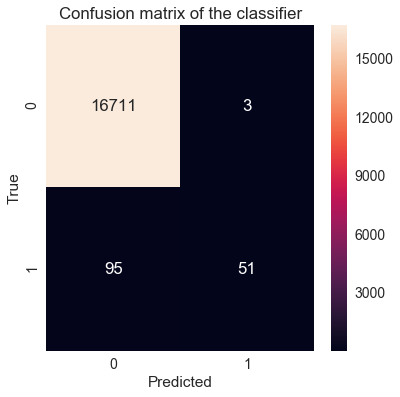

In [28]:
## EXTRA: Confusion Matrix
import seaborn as sn; sn.set()
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (6,6))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

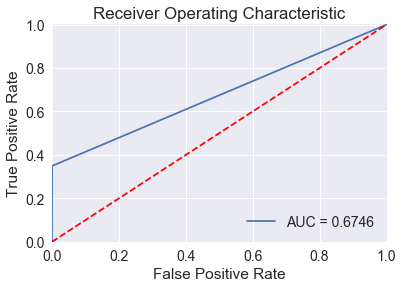

In [21]:
#ROC Curve
from sklearn.metrics import roc_curve,auc
#fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();